## Finding Line/Columns Segments from Given Points

In this tutorial we shall see how we can segment a papyrus or stele into its columns or lines using PySesh (OCR-HTR tool for Ancient Egyptian)

First we import the necessary packages

In [1]:
import os  # path manipulation
import numpy as np  # array/matrix manipulation
import scipy.ndimage as nd  # operate easily on image matrices
import matplotlib.pyplot as plt  # plotting library
import cv2  # mostly here for image io
import time # for simple benchmarking
import pdb

In [2]:
# importing project code
current_dir = os.getcwd()
print(current_dir)

/media/kaan/Data7510/GitProjects/PySesh/tutorials/English/FindingLineColumnSegmentsFromPoints


In [3]:
langdir = os.path.join(current_dir, os.pardir)
tutodir = os.path.join(langdir, os.pardir)
projectdir = os.path.join(tutodir, os.pardir)
maindir = os.path.join(projectdir, 'pysesh')
coredir = os.path.join(maindir, 'core')
os.chdir(coredir)

In [4]:
from modules.imageop.segmenters import pointcarver as psc
os.chdir(current_dir)

In [7]:
imdir = os.path.join(tutodir,'images')
im1path = os.path.join(imdir, 'hieratikSatir.png')
im2path = os.path.join(imdir, 'hiyeroglifSutun.png')
im3path = os.path.join(imdir, 'papyrus01')
im1, im2, im3 = cv2.imread(im1path), cv2.imread(im2path), cv2.imread(im3path)

In [8]:
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width to 12 and height to 9
fig_size[0] = 21
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size


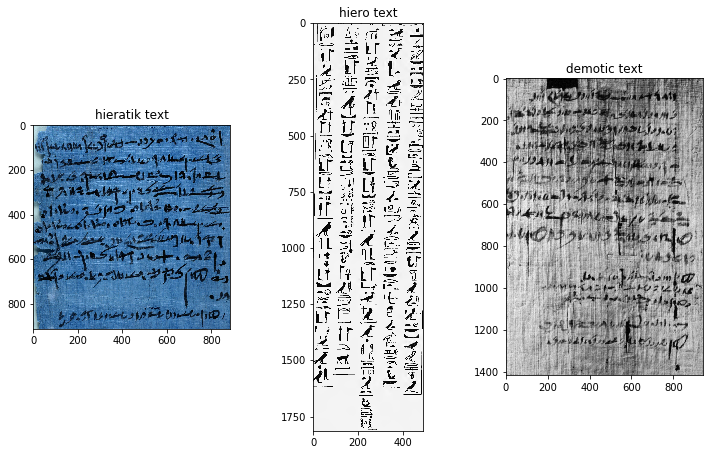

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 7.5))
ax1.set_title("hieratik text")
ax1.imshow(im1)

ax2.set_title('hiero text')
ax2.imshow(im2)

ax3.set_title('demotic text')
ax3.imshow(im3)

plt.show()

In [21]:
im1points = [(30, 30),(120, 30), 
             (195, 30), (280, 30), (350, 30), 
             (420, 30),(500, 30), (580, 30), (640, 30),(730, 30),]
#im1points = [(p[1], p[0]) for p in im1points]

In [22]:
# mark the points
im1cp = im1.copy()
for p in im1points:
    cent = p[1], p[0]
    im1cp = cv2.circle(im1cp, cent, 5, (0,255,0))

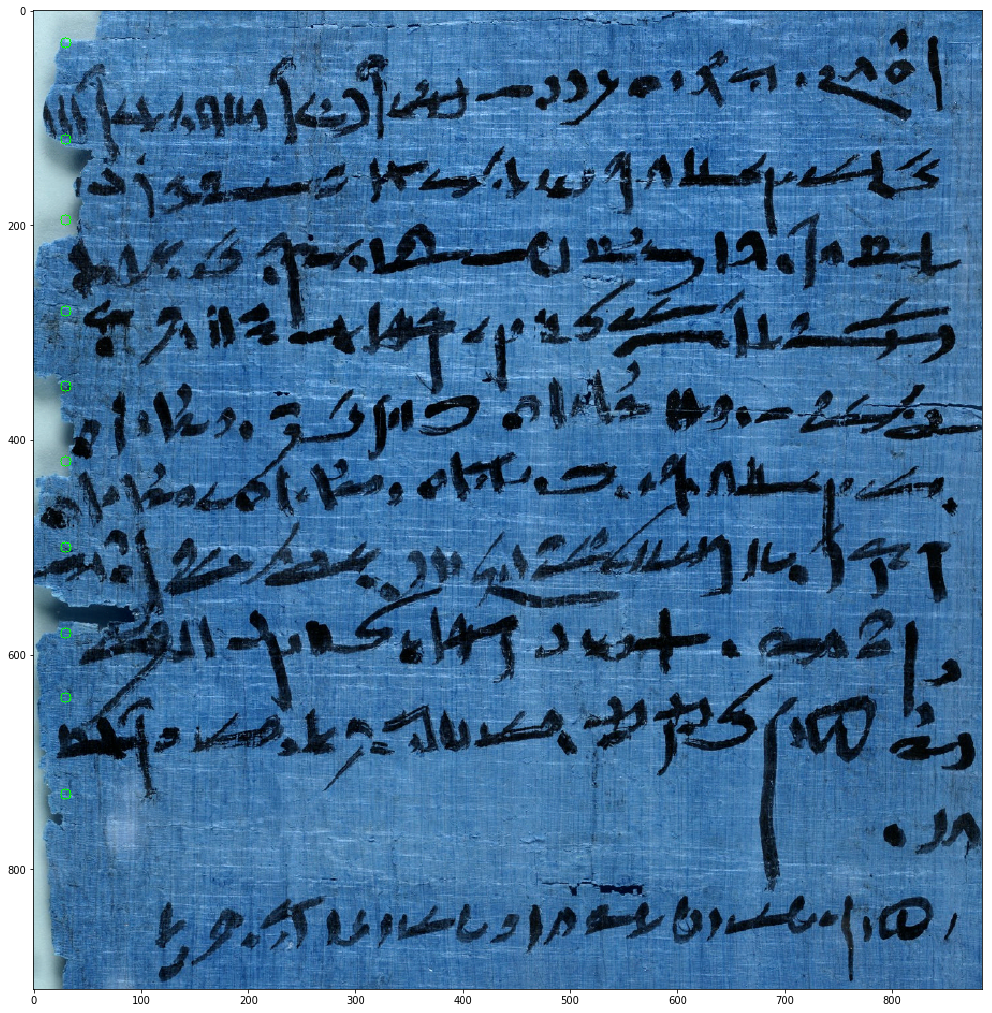

In [23]:
plt.imshow(im1cp)

In [24]:
im1cp = im1.copy()
marker = psc.SeamMarker(img=im1cp, 
                        plist=im1points, 
                        direction='right',
                        thresh=10
                       )
im1Marked = marker.segmentWithPoints()

In [27]:
m1, m2, m3, m4, m5, m6, m7, m8, m9 = im1Marked

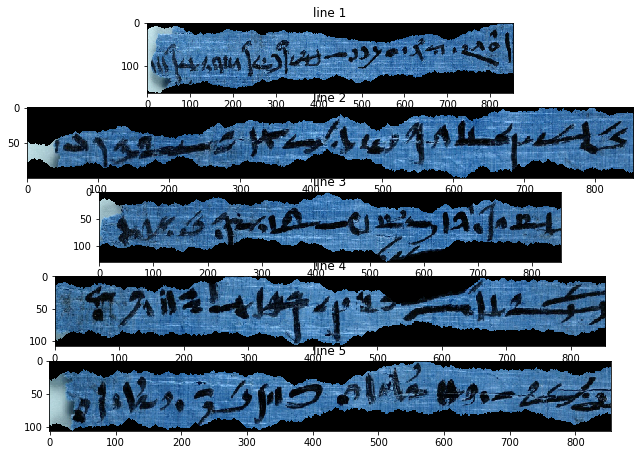

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 7.5))

ax1.set_title('line 1')
ax1.imshow(m1[0])

ax2.set_title('line 2')
ax2.imshow(m2[0])

ax3.set_title('line 3')
ax3.imshow(m3[0])

ax4.set_title('line 4')
ax4.imshow(m4[0])

ax5.set_title('line 5')
ax5.imshow(m5[0])

In [38]:
im2points = [
    (10, 3), (10, 100), (10, 210), (10, 305), (10,410)
]

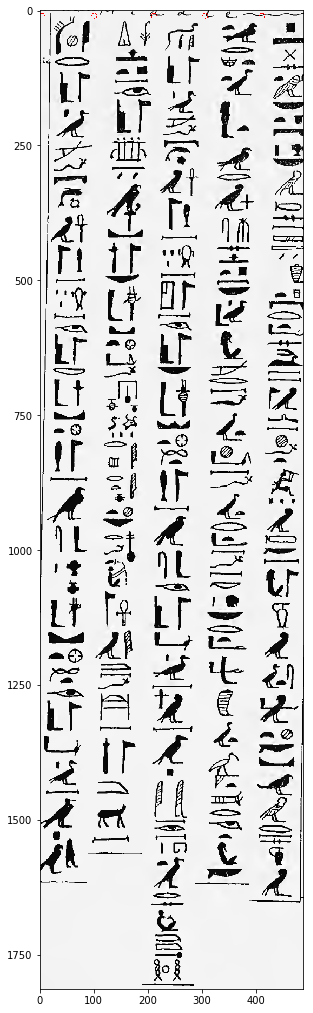

In [39]:
# mark the points
im2cp = im2.copy()
for p in im2points:
    cent = p[1], p[0]
    im1cp = cv2.circle(im2cp, cent, 5, (255,0,0))
    
plt.imshow(im2cp)

In [40]:
im2cp = im2.copy()
marker = psc.SeamMarker(img=im2cp, 
                        plist=im2points, 
                        direction='down',
                        thresh=10
                       )
im2Marked = marker.segmentWithPoints()

In [42]:
m1, m2, m3, m4 = im2Marked

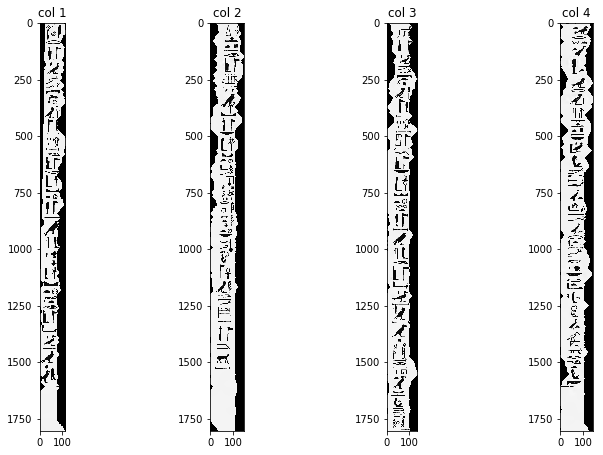

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 7.5))

ax1.set_title('col 1')
ax1.imshow(m1[0])

ax2.set_title('col 2')
ax2.imshow(m2[0])

ax3.set_title('col 3')
ax3.imshow(m3[0])

ax4.set_title('col 4')
ax4.imshow(m4[0])